In [5]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def plotdata(filename='./sim_perf.txt', ttl=''):
    sd = pd.read_csv(filename, sep=';')
    sd['loss'] = sd['loss'].astype(float)
    sd['epsilon'] = sd['epsilon'].astype(float)
    plt.figure(figsize=(16, 8))
    plt.title(ttl)
    plt.plot(sd['epoch'], sd['rougeF1'], c='blue', label='F1')
    plt.plot(sd['epoch'], sd['rougePrecision'], c='green', label='Precision')
    plt.plot(sd['epoch'], sd['rougeRecall'], c='purple', label='Recall')
#     plt.ylim([0,1])
    plt.ylabel("Rouge, Loss, & Epsilon value")
    plt.xlabel("Training Epoch")
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure(figsize=(16, 4))
    plt.plot(sd['epoch'], sd['loss'], c='red')
    plt.grid()
    plt.show()
    return sd

def plotSelection(model, nepochs):
    ofile_names = [('./plotdata/%s/%i_epoch.txt' % (model, x) ) for x in range(nepochs) ] 
    for (ofile, epoch) in zip(ofile_names, range(nepochs)):
        odf = pd.read_csv(ofile, sep=';')
        if epoch==0:
            tdf = pd.DataFrame(pd.Series(odf['Skip']))
            tdf['Select'] = odf['Select']
        else:
            tdf['Skip'] += odf['Skip']
            tdf['Select'] += odf['Select']
            
    tdf['SkipRate'] = tdf['Skip'] / float(nepochs)
    tdf['SelectRate'] = tdf['Select'] / float(nepochs)
    tdf = tdf.reset_index()
    plt.figure(figsize=(16, 15))
    plt.bar(tdf['index'], tdf['SelectRate'], color='red', edgecolor='white')
    plt.show()

In [250]:
sd = pd.read_csv("./lstm_perf.txt", sep=';')

# Example learning Precision on 20 Records

In [267]:
! time th testModel.lua --nepochs 100 --gamma 0. \
    --learning_rate 1e-4 --cuts 10 \
    --edim 50 --mem_size 300 --metric precision --n_samples 20 \
    --base_explore_rate 0.05 --model lstm --end_baserate 50

...Utils file loaded	
...running on CPU	
Running LSTM model to learn precision	
0.095365418894831	
14	
Model complete {Selected = 1; Skipped  = 18}; Final Rouge Recall, Precision, F1 = {0.008222;0.640000;0.016235}	

real	6m39.132s
user	6m36.311s
sys	0m12.962s


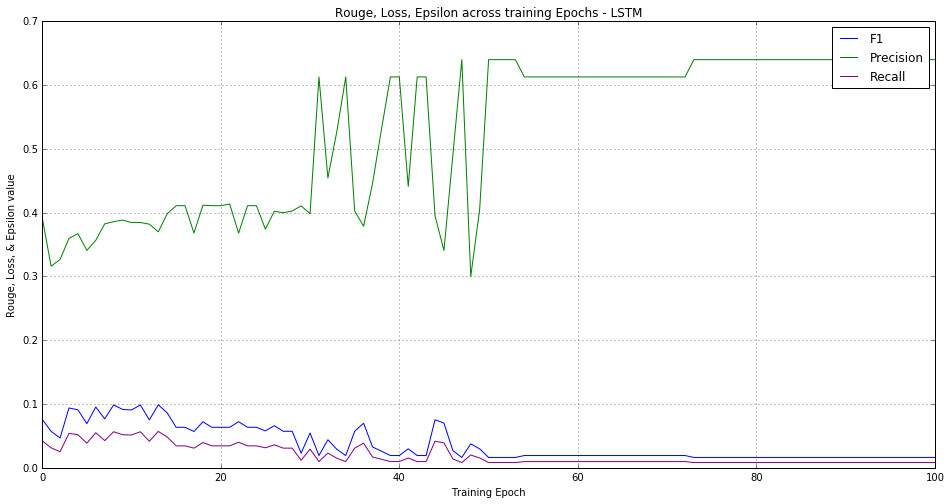

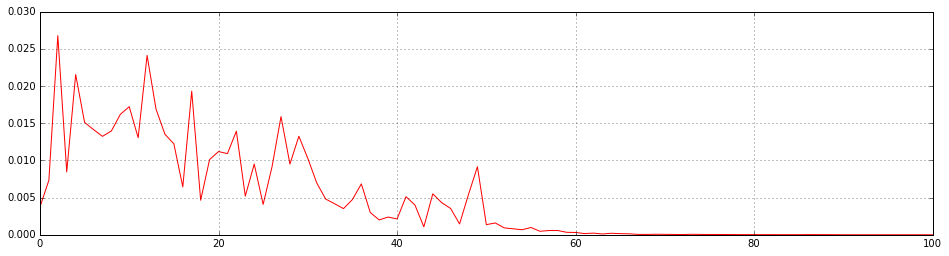

In [268]:
_ = plotdata('./lstm_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - LSTM')

# Example learning Recall on 20 Records

In [260]:
! time th testModelold.lua --nepochs 100 --gamma 0. \
    --learning_rate 1e-4 --cuts 10 \
    --edim 50 --mem_size 300 --metric recall --n_samples 20 \
    --base_explore_rate 0.05 --nnmod lstm

...Utils file loaded	
Running LSTM model to learn recall	
...running on CPU	
0.095365418894831	
14	
Model complete {Selected = 13; Skipped  = 6}; Final Rouge Recall, Precision, F1 = {0.054471;0.364261;0.094770}	

real	8m41.079s
user	8m43.970s
sys	0m20.955s


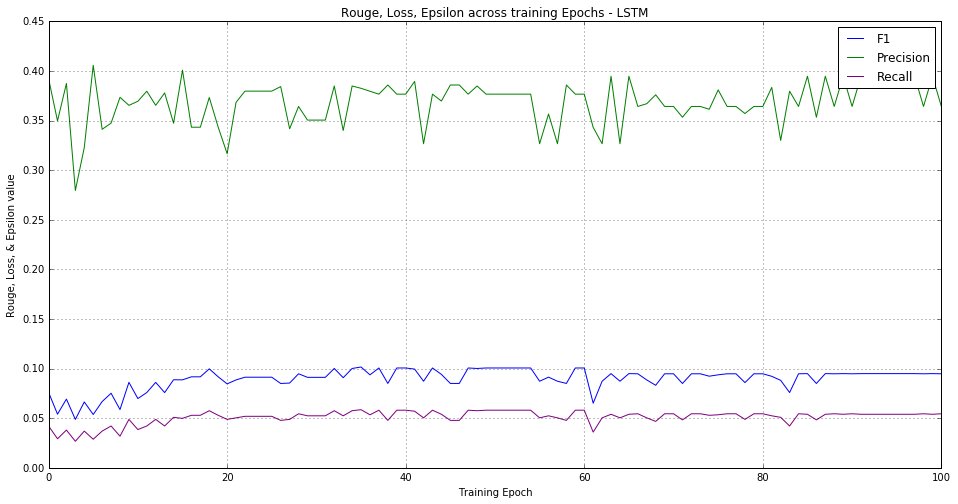

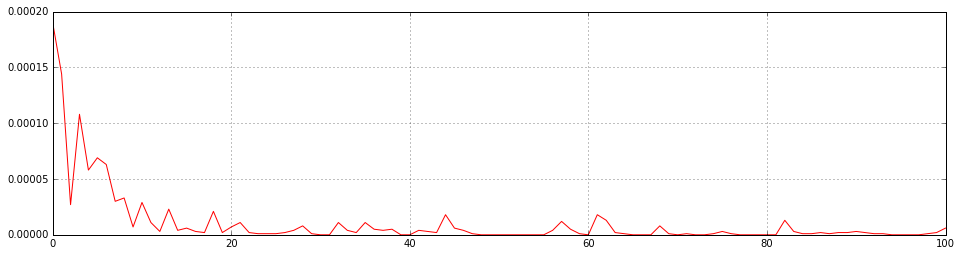

In [261]:
_ = plotdata('./lstm_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - LSTM')

# Example learning f1 on 20 Records

In [ ]:
! time th testModelold.lua --nepochs 100 --gamma 0. \
    --learning_rate 1e-4 --cuts 10 \
    --edim 50 --mem_size 300 --metric f1 --n_samples 20 \
    --base_explore_rate 0.05 --nnmod lstm

...Utils file loaded	
Running LSTM model to learn f1	
...running on CPU	
0.095365418894831	
14	


In [ ]:
_ = plotdata('./lstm_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - LSTM')

In [ ]:
plotSelection('lstm', 100)